1) Read excel file, with verbs for search (https://docs.google.com/spreadsheets/d/12P0y3Yr5OVZ-YuGjnE-j8TQx6ZCD_2Ej/edit#gid=879268321) Sheet2, Sheet3

---


2) Collect the lists for each verb category(column):
Crime2, Crime, Crime3, INJURE, MOVEMENT, TRAFFIC ACCIDENT, police, ARREST, TRIAL 

Sheet2: Columns(N, O, P, Q)

Sheet3: Columns(B, C, E, F, G)


---
3) Search these words in csv file: [verbs_for_search_with_relations.csv]
Fill the table with `original form`


---
4) Make lemmatization for these words and search them in csv file: [verbs_for_search_with_relations.csv] also lemmatized
Fill the table with `lemmatization form`


---
5) Make stemming for these words and search them in csv file: [verbs_for_search_with_relations.csv] also stemmed 
Fill the table with `stemming form`

---
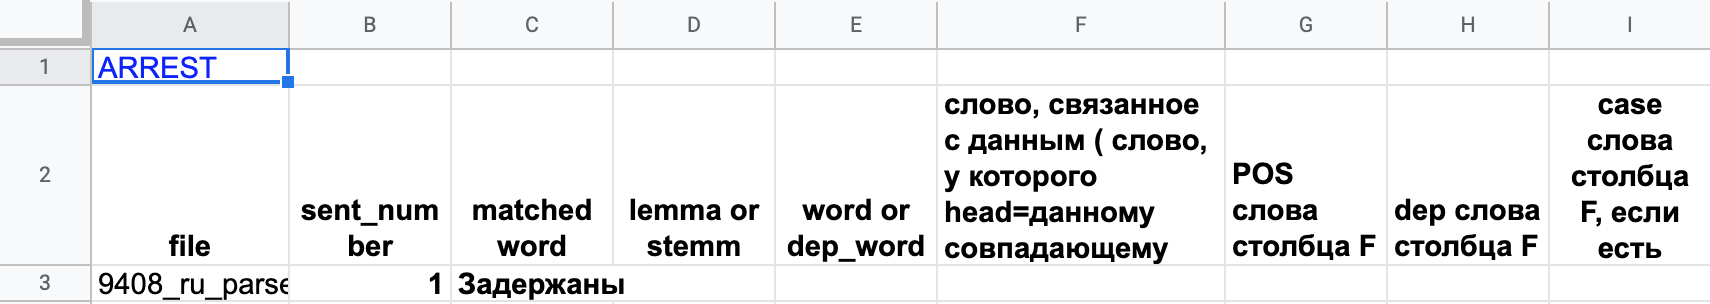
6) Save created files in the folser with each verb category(column) name in the general results folder: https://drive.google.com/drive/folders/18cERlZg7rOd-qVvdDJfBmsmcznnP1UFT?usp=sharing






In [ ]:
!pip install pandas
import pandas as pd
import os

In [ ]:
# reading csv file with verbs for matching
path_to_csv = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/verbs_for_search_with_relations.csv'
df_verbs = pd.read_csv(path_to_csv)
print(df_verbs['table_verb'])

0          пытается
1          пытается
2          избежать
3          пытается
4          пытается
            ...    
85553        больше
85554        грозит
85555        грозит
85556        грозит
85557    Поделиться
Name: table_verb, Length: 85558, dtype: object


# Creating files with original form of verb

In [ ]:
path_to_excel = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/trigers and argument_new.xlsx'

In [ ]:
# reading sheet2
df_sheet2 = pd.ExcelFile(path_to_excel).parse('Лист2') #you could add index_col=0 if there's an index
print(df_sheet2)


for i in df_sheet2:
  if i in ["crime2", "crime", "crime3", "INJURE"]:
    result_df = pd.DataFrame()
    print(i)
    print(list(df_sheet2[i]))
    for search_verb in list(df_sheet2[i]):
          for verb in df_verbs['table_verb']:
            if isinstance(search_verb, str) and search_verb.lower() == verb.lower():
              print(search_verb)
              result_df = result_df.append(df_verbs.loc[df_verbs['table_verb'] == verb])
    folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+str(i)
    os.makedirs(folder_path)
    print(result_df)
    df_no_dublicates = result_df.drop_duplicates().reset_index(drop=True)
    df_no_dublicates = df_no_dublicates.drop(['Unnamed: 0'],axis=1)
    print(df_no_dublicates)
    save_path = folder_path+'/original_form.csv'
    df_no_dublicates.to_csv(save_path, index_label=False, index=False,)

In [ ]:
# reading sheet3
df_sheet3 = pd.ExcelFile(path_to_excel).parse('Лист3') #you could add index_col=0 if there's an index
print(df_sheet3)

for col in df_sheet3:
  if col not in  ['Unnamed: 0', 'Unnamed: 3']:
    result_df = pd.DataFrame()
    print(col)
    print(list(df_sheet3[col]))
    for search_verb in list(df_sheet3[col]):
          for verb in df_verbs['table_verb']:
            if isinstance(search_verb, str) and search_verb.lower() == verb.lower():
              print(search_verb)
              result_df = result_df.append(df_verbs.loc[df_verbs['table_verb'] == verb])
    if col == "Unnamed: 2":
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+'MOVEMENT'
    elif col == "Unnamed: 5":
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+'ARREST'
    elif col == "Unnamed: 6":
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+'TRIAL'
    else:
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+str(col)
    os.makedirs(folder_path)
    print(result_df)
    df_no_dublicates = result_df.drop_duplicates().reset_index(drop=True)
    df_no_dublicates = df_no_dublicates.drop(['Unnamed: 0'],axis=1)
    print(df_no_dublicates)
    save_path = folder_path+'/original_form.csv'
    df_no_dublicates.to_csv(save_path, index_label=False, index=False,)

In [ ]:
print(result_df)
df_no_dublicates = result_df.drop_duplicates().reset_index(drop=True)
df_no_dublicates = df_no_dublicates.drop(['Unnamed: 0'],axis=1)
print(df_no_dublicates)
df_no_dublicates.to_csv('/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result.csv', index_label=False, index=False,)

       Unnamed: 0            file  sent_number  ...    POS DEP_type  Case
15259       15259  9316_ru_parsed            0  ...   NOUN      obj   Acc
21506       21506  3421_ru_parsed            3  ...    ADV   advmod  None
21508       21508  3421_ru_parsed            3  ...   NOUN      obj   Acc
28469       28469  4710_ru_parsed            4  ...   NOUN      obl   Gen
28470       28470  4710_ru_parsed            4  ...   NOUN      obj   Acc
...           ...             ...          ...  ...    ...      ...   ...
79794       79794  2550_ru_parsed            7  ...  PROPN      obl   Acc
79795       79795  2550_ru_parsed            7  ...   NOUN      obl   Dat
79796       79796  2550_ru_parsed            7  ...   VERB     conj  None
80095       80095  3820_ru_parsed            9  ...  PROPN      obl   Acc
80096       80096  3820_ru_parsed            9  ...   VERB     conj  None

[49039 rows x 8 columns]
                file  sent_number  table_verb   dep_word   POS DEP_type  Case
0     93

# Creating files with stemming

In [ ]:
!pip install nltk
import nltk
from nltk.stem.snowball import SnowballStemmer 

stemmer = SnowballStemmer("russian") 

'васил'

In [ ]:
# reading sheet2
df_sheet2 = pd.ExcelFile(path_to_excel).parse('Лист2') #you could add index_col=0 if there's an index
print(df_sheet2)


for i in df_sheet2:
  if i in ["crime2", "crime", "crime3", "INJURE"]:
    result_df = pd.DataFrame()
    print(i)
    print(list(df_sheet2[i]))
    for search_verb in list(df_sheet2[i]):
          for verb in df_verbs['table_verb']:
            if isinstance(search_verb, str) and stemmer.stem(search_verb) == stemmer.stem(verb):
              print(search_verb)
              result_df = result_df.append(df_verbs.loc[df_verbs['table_verb'] == verb])
    folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+str(i)
    print(result_df)
    df_no_dublicates = result_df.drop_duplicates().reset_index(drop=True)
    df_no_dublicates = df_no_dublicates.drop(['Unnamed: 0'],axis=1)
    print(df_no_dublicates)
    save_path = folder_path+'/stemming.csv'
    df_no_dublicates.to_csv(save_path, index_label=False, index=False,)

In [ ]:
# reading sheet3
df_sheet3 = pd.ExcelFile(path_to_excel).parse('Лист3') #you could add index_col=0 if there's an index
print(df_sheet3)

for col in df_sheet3:
  if col not in  ['Unnamed: 0', 'Unnamed: 3']:
    result_df = pd.DataFrame()
    print(col)
    print(list(df_sheet3[col]))
    for search_verb in list(df_sheet3[col]):
          for verb in df_verbs['table_verb']:
              if isinstance(search_verb, str) and stemmer.stem(search_verb) == stemmer.stem(verb):
                  print(search_verb)
                  result_df = result_df.append(df_verbs.loc[df_verbs['table_verb'] == verb])
    if col == "Unnamed: 2":
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+'MOVEMENT'
    elif col == "Unnamed: 5":
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+'ARREST'
    elif col == "Unnamed: 6":
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+'TRIAL'
    else:
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+str(col)
    print(result_df)
    df_no_dublicates = result_df.drop_duplicates().reset_index(drop=True)
    df_no_dublicates = df_no_dublicates.drop(['Unnamed: 0'],axis=1)
    print(df_no_dublicates)
    save_path = folder_path+'/stemming.csv'
    df_no_dublicates.to_csv(save_path, index_label=False, index=False,)

# Create files applying lemmatisation

In [ ]:
!pip install stanfordnlp
import stanfordnlp
from spacy_stanfordnlp import StanfordNLPLanguage

stanfordnlp.download("ru")

snlp = stanfordnlp.Pipeline(lang="ru")
nlp = StanfordNLPLanguage(snlp)

In [ ]:
# reading csv file with verbs for matching
path_to_csv = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/verbs_for_search_with_relations.csv'
df_verbs = pd.read_csv(path_to_csv)
print(df_verbs['table_verb'])

In [ ]:
path_to_excel = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/trigers and argument_new.xlsx'

In [ ]:
# reading sheet2
df_sheet2 = pd.ExcelFile(path_to_excel).parse('Лист2')
print(df_sheet2)


for i in df_sheet2:
  if i in ["crime2", "crime", "crime3", "INJURE"]:
    result_df = pd.DataFrame()
    print(i)
    print(list(df_sheet2[i]))
    for search_verb in list(df_sheet2[i]):
          for verb in df_verbs['table_verb']:
            if isinstance(search_verb, str) and isinstance(verb, str):
              verb1 = nlp(search_verb)
              verb2 = nlp(verb)
              if verb1[0].lemma_.lower() ==  verb2[0].lemma_.lower():
                  print(search_verb)
                  result_df = result_df.append(df_verbs.loc[df_verbs['table_verb'] == verb])
    folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+str(i)
    print(result_df)
    df_no_dublicates = result_df.drop_duplicates().reset_index(drop=True)
    df_no_dublicates = df_no_dublicates.drop(['Unnamed: 0'],axis=1)
    print(df_no_dublicates)
    save_path = folder_path+'/lemmatization.csv'
    df_no_dublicates.to_csv(save_path, index_label=False, index=False,)

In [ ]:
# reading sheet3
df_sheet3 = pd.ExcelFile(path_to_excel).parse('Лист3') #you could add index_col=0 if there's an index
print(df_sheet3)

for col in df_sheet3:
  if col not in  ['Unnamed: 0', 'Unnamed: 3']:
    result_df = pd.DataFrame()
    print(col)
    print(list(df_sheet3[col]))
    for search_verb in list(df_sheet3[col]):
          for verb in df_verbs['table_verb']:
            if isinstance(search_verb, str) and isinstance(verb, str):
                  verb1 = nlp(search_verb)
                  verb2 = nlp(verb)
                  if verb1[0].lemma_.lower() ==  verb2[0].lemma_.lower():
                      print(search_verb)
                      result_df = result_df.append(df_verbs.loc[df_verbs['table_verb'] == verb])
    if col == "Unnamed: 2":
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+'MOVEMENT'
    elif col == "Unnamed: 5":
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+'ARREST'
    elif col == "Unnamed: 6":
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+'TRIAL'
    else:
      folder_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/'+str(col)
    print(result_df)
    df_no_dublicates = result_df.drop_duplicates().reset_index(drop=True)
    df_no_dublicates = df_no_dublicates.drop(['Unnamed: 0'],axis=1)
    print(df_no_dublicates)
    save_path = folder_path+'/lemmatization.csv'
    df_no_dublicates.to_csv(save_path, index_label=False, index=False,)